- **MODELISATION :** 


1) Chargement et transformation des données
2) Modélisation
3) Résultats de la modélisation
    - RandomForestClassifier
    - Regression Logistique
    - XGBoost Classifier
4) Prédiction du meilleur modèle
5) Features Importances
6) Conclusion

In [5]:
#!pip3 install mlflow 
#!pip3 install evidently
!pip3 install xgboost



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#IMPORT POUR CHARGEMENTS ET TRANSFORMATIONS
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px


In [7]:


#IMPORT POUR ENREGISTRER LA PERFORMANCE DES MODELES
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

#IMPORT MONITORING
import evidently
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, ClassificationPreset




#IMPORT POUR LA MODELISATION
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer, log_loss

from sklearn.utils.validation import _num_features
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn import preprocessing

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector



#IMPORT POUR FEATURES IMPORTANCES
import shap

# Import
import xgboost as xgb


from imblearn.over_sampling import SMOTE

d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background-color:#934bd6; padding: 10px">
<h2>Chargement des données</h2>
</div>

Dans cette section, nous avons les étapes suivantes :

- Chargement des données
- Traitement des valeurs manquantes
- Définition des variables catégorielles et numériques

In [8]:
df = pd.read_csv("app_train_sample_clean.csv")
df.head(5)

AGE  ID_CLIENT  CIBLE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  \
0   47     196888      0               0     1350000.0       39604.5   
1   54     101392      0               2      573628.5       24435.0   
2   25     435135      0               2      298512.0       19948.5   
3   29     396314      0               5      218016.0       17352.0   
4   44     341153      1               0     1006920.0       42790.5   

   CNT_FAM_MEMBERS  MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  ...  \
0              2.0           1350000.0      135000.0          0.761443  ...   
1              2.0            463500.0       81000.0          0.396825  ...   
2              1.0            270000.0      112500.0          0.385353  ...   
3              2.0            180000.0       81000.0          0.545649  ...   
4              2.0            900000.0       90000.0          0.444443  ...   

   TYPE_REVENUS_Maternity leave  TYPE_REVENUS_State servant  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   TYPE_REVENUS_Working  GENRE_M  NIVEAU_EDUCATION_Higher education  \
0                     1        0                                  1   
1                     1        0                                  1   
2                     1        0                                  1   
3                     1        1                                  1   
4                     1        0                                  0   

   NIVEAU_EDUCATION_Incomplete higher  NIVEAU_EDUCATION_Lower secondary  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   NIVEAU_EDUCATION_Secondary / secondary special  PROPRIETAIRE_VOITURE_Y  \
0                                               0                       0   
1                                               0                       1   
2                                               0                       0   
3                                               0                       0   
4                                               1                       0   

   nbr_membre  
0           1  
1           1  
2           0  
3           1  
4           1  

[5 rows x 29 columns]

In [9]:
df.tail()

AGE  ID_CLIENT  CIBLE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  \
25141   33     332801      0              15      992556.0       29151.0   
25142   41     351130      0               5      117162.0       11718.0   
25143   41     311641      0               3      808650.0       23773.5   
25144   37     151728      1              20       85500.0        9108.0   
25145   58     389739      0               3     1288350.0       37053.0   

       CNT_FAM_MEMBERS  MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  \
25141              1.0            711000.0      135000.0          0.441798   
25142              1.0            103500.0      144000.0          0.342067   
25143              3.0            675000.0       90000.0          0.621768   
25144              1.0             85500.0       40500.0          0.393861   
25145              1.0           1125000.0      148500.0          0.670388   

       ...  TYPE_REVENUS_Maternity leave  TYPE_REVENUS_State servant  \
25141  ...                             0                           0   
25142  ...                             0                           0   
25143  ...                             0                           1   
25144  ...                             0                           0   
25145  ...                             0                           0   

       TYPE_REVENUS_Working  GENRE_M  NIVEAU_EDUCATION_Higher education  \
25141                     1        1                                  0   
25142                     1        0                                  0   
25143                     0        0                                  0   
25144                     1        1                                  0   
25145                     1        0                                  0   

       NIVEAU_EDUCATION_Incomplete higher  NIVEAU_EDUCATION_Lower secondary  \
25141                                   0                                 0   
25142                                   0                                 0   
25143                                   0                                 0   
25144                                   0                                 0   
25145                                   0                                 0   

       NIVEAU_EDUCATION_Secondary / secondary special  PROPRIETAIRE_VOITURE_Y  \
25141                                               1                       1   
25142                                               1                       0   
25143                                               1                       0   
25144                                               1                       0   
25145                                               1                       1   

       nbr_membre  
25141           0  
25142           0  
25143           2  
25144           0  
25145           0  

[5 rows x 29 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25146 entries, 0 to 25145
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   AGE                                             25146 non-null  int64  
 1   ID_CLIENT                                       25146 non-null  int64  
 2   CIBLE                                           25146 non-null  int64  
 3   YEARS_EMPLOYED                                  25146 non-null  int64  
 4   TOTAL_CREDIT                                    25146 non-null  float64
 5   REMB_MENSUEL                                    25146 non-null  float64
 6   CNT_FAM_MEMBERS                                 25146 non-null  float64
 7   MONTANT_PRIX_BIENS                              25127 non-null  float64
 8   REVENU_TOTAL                                    25146 non-null  float64
 9   SOURCE_EXTERNE_2                       

In [11]:
df.isna().sum()

AGE                                                0
ID_CLIENT                                          0
CIBLE                                              0
YEARS_EMPLOYED                                     0
TOTAL_CREDIT                                       0
REMB_MENSUEL                                       0
CNT_FAM_MEMBERS                                    0
MONTANT_PRIX_BIENS                                19
REVENU_TOTAL                                       0
SOURCE_EXTERNE_2                                  44
FLAG_DOCUMENT_3                                    0
FLAG_DOCUMENT_6                                    0
FLAG_DOCUMENT_8                                    0
TYPE_CONTRAT_Revolving loans                       0
STATUT_FAMILIAL_Married                            0
STATUT_FAMILIAL_Separated                          0
STATUT_FAMILIAL_Single / not married               0
STATUT_FAMILIAL_Widow                              0
PROPRIETAIRE_BIEN_IMMO_Y                      

In [12]:
df.dropna(subset=['MONTANT_PRIX_BIENS', 'SOURCE_EXTERNE_2'], inplace=True)

In [13]:
df.shape

(25083, 29)

In [14]:
df

AGE  ID_CLIENT  CIBLE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  \
0       47     196888      0               0     1350000.0       39604.5   
1       54     101392      0               2      573628.5       24435.0   
2       25     435135      0               2      298512.0       19948.5   
3       29     396314      0               5      218016.0       17352.0   
4       44     341153      1               0     1006920.0       42790.5   
...    ...        ...    ...             ...           ...           ...   
25141   33     332801      0              15      992556.0       29151.0   
25142   41     351130      0               5      117162.0       11718.0   
25143   41     311641      0               3      808650.0       23773.5   
25144   37     151728      1              20       85500.0        9108.0   
25145   58     389739      0               3     1288350.0       37053.0   

       CNT_FAM_MEMBERS  MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  \
0                  2.0           1350000.0      135000.0          0.761443   
1                  2.0            463500.0       81000.0          0.396825   
2                  1.0            270000.0      112500.0          0.385353   
3                  2.0            180000.0       81000.0          0.545649   
4                  2.0            900000.0       90000.0          0.444443   
...                ...                 ...           ...               ...   
25141              1.0            711000.0      135000.0          0.441798   
25142              1.0            103500.0      144000.0          0.342067   
25143              3.0            675000.0       90000.0          0.621768   
25144              1.0             85500.0       40500.0          0.393861   
25145              1.0           1125000.0      148500.0          0.670388   

       ...  TYPE_REVENUS_Maternity leave  TYPE_REVENUS_State servant  \
0      ...                             0                           0   
1      ...                             0                           0   
2      ...                             0                           0   
3      ...                             0                           0   
4      ...                             0                           0   
...    ...                           ...                         ...   
25141  ...                             0                           0   
25142  ...                             0                           0   
25143  ...                             0                           1   
25144  ...                             0                           0   
25145  ...                             0                           0   

       TYPE_REVENUS_Working  GENRE_M  NIVEAU_EDUCATION_Higher education  \
0                         1        0                                  1   
1                         1        0                                  1   
2                         1        0                                  1   
3                         1        1                                  1   
4                         1        0                                  0   
...                     ...      ...                                ...   
25141                     1        1                                  0   
25142                     1        0                                  0   
25143                     0        0                                  0   
25144                     1        1                                  0   
25145                     1        0                                  0   

       NIVEAU_EDUCATION_Incomplete higher  NIVEAU_EDUCATION_Lower secondary  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0

In [15]:
df.columns.tolist()

['AGE',
 'ID_CLIENT',
 'CIBLE',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'CNT_FAM_MEMBERS',
 'MONTANT_PRIX_BIENS',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TYPE_CONTRAT_Revolving loans',
 'STATUT_FAMILIAL_Married',
 'STATUT_FAMILIAL_Separated',
 'STATUT_FAMILIAL_Single / not married',
 'STATUT_FAMILIAL_Widow',
 'PROPRIETAIRE_BIEN_IMMO_Y',
 'TYPE_REVENUS_Maternity leave',
 'TYPE_REVENUS_State servant',
 'TYPE_REVENUS_Working',
 'GENRE_M',
 'NIVEAU_EDUCATION_Higher education',
 'NIVEAU_EDUCATION_Incomplete higher',
 'NIVEAU_EDUCATION_Lower secondary',
 'NIVEAU_EDUCATION_Secondary / secondary special',
 'PROPRIETAIRE_VOITURE_Y',
 'nbr_membre']

In [16]:
#liste col num to cat 

col_cat = [
 'SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TYPE_CONTRAT_Revolving loans',
 'STATUT_FAMILIAL_Married',
 'STATUT_FAMILIAL_Separated',
 'STATUT_FAMILIAL_Single / not married',
 'STATUT_FAMILIAL_Widow',
 'PROPRIETAIRE_BIEN_IMMO_Y',
 'TYPE_REVENUS_Maternity leave',
 'TYPE_REVENUS_Pensioner',
 'TYPE_REVENUS_State servant',
 'TYPE_REVENUS_Unemployed',
 'TYPE_REVENUS_Working',
 'GENRE_M',
 'NIVEAU_EDUCATION_Higher education',
 'NIVEAU_EDUCATION_Incomplete higher',
 'NIVEAU_EDUCATION_Lower secondary',
 'NIVEAU_EDUCATION_Secondary / secondary special',
 'PROPRIETAIRE_VOITURE_Y'
 ]

In [17]:
s = set(col_cat)
col_num = [x for x in df.columns.tolist() if x not in s]
col_num

['AGE',
 'ID_CLIENT',
 'CIBLE',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'CNT_FAM_MEMBERS',
 'MONTANT_PRIX_BIENS',
 'REVENU_TOTAL',
 'nbr_membre']

In [18]:
col_num.remove('ID_CLIENT')
col_num.remove('CIBLE')

#Suppression pour ne pas normaliser ces deux colonnes
col_num.remove('AGE')
col_num.remove('YEARS_EMPLOYED')


In [19]:
col_cat

['SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TYPE_CONTRAT_Revolving loans',
 'STATUT_FAMILIAL_Married',
 'STATUT_FAMILIAL_Separated',
 'STATUT_FAMILIAL_Single / not married',
 'STATUT_FAMILIAL_Widow',
 'PROPRIETAIRE_BIEN_IMMO_Y',
 'TYPE_REVENUS_Maternity leave',
 'TYPE_REVENUS_Pensioner',
 'TYPE_REVENUS_State servant',
 'TYPE_REVENUS_Unemployed',
 'TYPE_REVENUS_Working',
 'GENRE_M',
 'NIVEAU_EDUCATION_Higher education',
 'NIVEAU_EDUCATION_Incomplete higher',
 'NIVEAU_EDUCATION_Lower secondary',
 'NIVEAU_EDUCATION_Secondary / secondary special',
 'PROPRIETAIRE_VOITURE_Y']

<div style="background-color:#934bd6; padding: 10px">
<h2>Modélisation</h2>
</div>

Dans section, nous allons traiter la modélisation en différentes étapes : 
    - Définition ensemble train_test
    - 

In [20]:
# Dataframe des autres features, supression des targets
df_modelisation = df.copy()
y = df_modelisation['CIBLE']
X = df_modelisation
X.drop(["ID_CLIENT", "CIBLE"], axis=1, inplace=True)


In [21]:
X

AGE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  CNT_FAM_MEMBERS  \
0       47               0     1350000.0       39604.5              2.0   
1       54               2      573628.5       24435.0              2.0   
2       25               2      298512.0       19948.5              1.0   
3       29               5      218016.0       17352.0              2.0   
4       44               0     1006920.0       42790.5              2.0   
...    ...             ...           ...           ...              ...   
25141   33              15      992556.0       29151.0              1.0   
25142   41               5      117162.0       11718.0              1.0   
25143   41               3      808650.0       23773.5              3.0   
25144   37              20       85500.0        9108.0              1.0   
25145   58               3     1288350.0       37053.0              1.0   

       MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  FLAG_DOCUMENT_3  \
0               1350000.0      135000.0          0.761443                1   
1                463500.0       81000.0          0.396825                1   
2                270000.0      112500.0          0.385353                1   
3                180000.0       81000.0          0.545649                1   
4                900000.0       90000.0          0.444443                1   
...                   ...           ...               ...              ...   
25141            711000.0      135000.0          0.441798                1   
25142            103500.0      144000.0          0.342067                1   
25143            675000.0       90000.0          0.621768                1   
25144             85500.0       40500.0          0.393861                1   
25145           1125000.0      148500.0          0.670388                0   

       FLAG_DOCUMENT_6  ...  TYPE_REVENUS_Maternity leave  \
0                    0  ...                             0   
1                    0  ...                             0   
2                    0  ...                             0   
3                    0  ...                             0   
4                    0  ...                             0   
...                ...  ...                           ...   
25141                0  ...                             0   
25142                0  ...                             0   
25143                0  ...                             0   
25144                0  ...                             0   
25145                1  ...                             0   

       TYPE_REVENUS_State servant  TYPE_REVENUS_Working  GENRE_M  \
0                               0                     1        0   
1                               0                     1        0   
2                               0                     1        0   
3                               0                     1        1   
4                               0                     1        0   
...                           ...                   ...      ...   
25141                           0                     1        1   
25142                           0                     1        0   
25143                           1                     0        0   
25144                           0                     1        1   
25145                           0                     1        0   

       NIVEAU_EDUCATION_Higher education  NIVEAU_EDUCATION_Incomplete higher  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      0                                   0   
...                                  ...                                 ...   
25141                                  0                   

In [22]:

y 

0        0
1        0
2        0
3        0
4        1
        ..
25141    0
25142    0
25143    0
25144    1
25145    0
Name: CIBLE, Length: 25083, dtype: int64

In [23]:
normalizer = preprocessing.Normalizer()
X[col_num] = normalizer.fit_transform(X[col_num])
X

AGE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  CNT_FAM_MEMBERS  \
0       47               0      0.705195      0.020688     1.044733e-06   
1       54               2      0.772750      0.032917     2.694253e-06   
2       25               2      0.713451      0.047677     2.390023e-06   
3       29               5      0.740024      0.058899     6.788713e-06   
4       44               0      0.743561      0.031599     1.476902e-06   
...    ...             ...           ...           ...              ...   
25141   33              15      0.807794      0.023725     8.138523e-07   
25142   41               5      0.550399      0.055048     4.697762e-06   
25143   41               3      0.764715      0.022482     2.837008e-06   
25144   37              20      0.668792      0.071244     7.822125e-06   
25145   58               3      0.750247      0.021577     5.823315e-07   

       MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  FLAG_DOCUMENT_3  \
0                0.705195      0.070519          0.761443                1   
1                0.624393      0.109117          0.396825                1   
2                0.645306      0.268878          0.385353                1   
3                0.610984      0.274943          0.545649                1   
4                0.664606      0.066461          0.444443                1   
...                   ...           ...               ...              ...   
25141            0.578649      0.109870          0.441798                1   
25142            0.486218      0.676478          0.342067                1   
25143            0.638327      0.085110          0.621768                1   
25144            0.668792      0.316796          0.393861                1   
25145            0.655123      0.086476          0.670388                0   

       FLAG_DOCUMENT_6  ...  TYPE_REVENUS_Maternity leave  \
0                    0  ...                             0   
1                    0  ...                             0   
2                    0  ...                             0   
3                    0  ...                             0   
4                    0  ...                             0   
...                ...  ...                           ...   
25141                0  ...                             0   
25142                0  ...                             0   
25143                0  ...                             0   
25144                0  ...                             0   
25145                1  ...                             0   

       TYPE_REVENUS_State servant  TYPE_REVENUS_Working  GENRE_M  \
0                               0                     1        0   
1                               0                     1        0   
2                               0                     1        0   
3                               0                     1        1   
4                               0                     1        0   
...                           ...                   ...      ...   
25141                           0                     1        1   
25142                           0                     1        0   
25143                           1                     0        0   
25144                           0                     1        1   
25145                           0                     1        0   

       NIVEAU_EDUCATION_Higher education  NIVEAU_EDUCATION_Incomplete higher  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      0                                   0   
...                                  ...                                 ...   
25141                                  0                   

In [24]:
# Séparation de l'ensemble X_train en 2 sous-ensembles

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)

X_train.shape, X_valid.shape

((17558, 27), (7525, 27))

In [25]:
# Standardisation des données

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train_sd = scaler.transform(X_train)
#X_valid_sd = scaler.transform(X_valid)
#normalizer = preprocessing.Normalizer()
#X_train[col_num] = normalizer.fit_transform(X_train[col_num])
#X_valid[col_num] = normalizer.transform(X_valid[col_num])

In [26]:
# Transformation des matrices standardisées en dataframe pour avoir les noms des variables

X_train_sd_df = pd.DataFrame(X_train, columns=list(X_train))
X_valid_sd_df = pd.DataFrame(X_valid, columns=list(X_train))
y_train_df = pd.DataFrame(y_train)
y_valid_df = pd.DataFrame(y_valid)

In [27]:
X_train

AGE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  CNT_FAM_MEMBERS  \
24148   34              13      0.797783      0.025846     8.466338e-07   
2353    40               7      0.704561      0.019375     1.342021e-06   
3096    45              20      0.742291      0.021704     5.761564e-07   
21205   44              16      0.774867      0.030820     1.391343e-06   
21152   45               2      0.721692      0.026002     1.214441e-06   
...    ...             ...           ...           ...              ...   
6671    28               6      0.763840      0.039205     3.148624e-06   
610     38               9      0.707618      0.048161     4.506334e-06   
16094   35               2      0.699855      0.028546     9.331396e-07   
11426   52              10      0.748782      0.021981     6.758080e-07   
4192    36               3      0.791139      0.028661     7.490938e-06   

       MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  FLAG_DOCUMENT_3  \
24148            0.571478      0.190493          0.680131                1   
2353             0.704561      0.082534          0.162145                1   
3096             0.648176      0.168526          0.457002                0   
21205            0.626104      0.081394          0.593135                1   
21152            0.623008      0.300574          0.198289                1   
...                   ...           ...               ...              ...   
6671             0.637596      0.092097          0.038375                1   
610              0.537380      0.456266          0.751841                1   
16094            0.699855      0.139971          0.610228                0   
11426            0.653844      0.106440          0.544797                1   
4192             0.556202      0.252819          0.776740                1   

       FLAG_DOCUMENT_6  ...  TYPE_REVENUS_Maternity leave  \
24148                0  ...                             0   
2353                 0  ...                             0   
3096                 0  ...                             0   
21205                0  ...                             0   
21152                0  ...                             0   
...                ...  ...                           ...   
6671                 0  ...                             0   
610                  0  ...                             0   
16094                0  ...                             0   
11426                0  ...                             0   
4192                 0  ...                             0   

       TYPE_REVENUS_State servant  TYPE_REVENUS_Working  GENRE_M  \
24148                           1                     0        0   
2353                            0                     1        0   
3096                            1                     0        1   
21205                           0                     1        0   
21152                           0                     0        1   
...                           ...                   ...      ...   
6671                            0                     1        0   
610                             0                     0        1   
16094                           0                     1        1   
11426                           0                     1        0   
4192                            0                     0        0   

       NIVEAU_EDUCATION_Higher education  NIVEAU_EDUCATION_Incomplete higher  \
24148                                  0                                   1   
2353                                   0                                   0   
3096                                   0                                   0   
21205                                  1                                   0   
21152                                  0                                   0   
...                                  ...                                 ...   
6671                                   0                   

In [28]:
X_train_sd_df.shape, X_valid_sd_df.shape, y_train_df.shape, y_valid_df.shape

((17558, 27), (7525, 27), (17558, 1), (7525, 1))

In [29]:
y.info()


<class 'pandas.core.series.Series'>
Index: 25083 entries, 0 to 25145
Series name: CIBLE
Non-Null Count  Dtype
--------------  -----
25083 non-null  int64
dtypes: int64(1)
memory usage: 391.9 KB


In [30]:
print("y_train_series - TARGET")
print(pd.DataFrame({
    "COUNT": y_train.value_counts(),
    "RATIO": y_train.value_counts() / len(y_train) * 100}))

y_train_series - TARGET
       COUNT      RATIO
CIBLE                  
0      16043  91.371455
1       1515   8.628545


**REGRESSION LOGISTIQUE**

In [31]:
X_train_sd_df.isna().sum()

AGE                                               0
YEARS_EMPLOYED                                    0
TOTAL_CREDIT                                      0
REMB_MENSUEL                                      0
CNT_FAM_MEMBERS                                   0
MONTANT_PRIX_BIENS                                0
REVENU_TOTAL                                      0
SOURCE_EXTERNE_2                                  0
FLAG_DOCUMENT_3                                   0
FLAG_DOCUMENT_6                                   0
FLAG_DOCUMENT_8                                   0
TYPE_CONTRAT_Revolving loans                      0
STATUT_FAMILIAL_Married                           0
STATUT_FAMILIAL_Separated                         0
STATUT_FAMILIAL_Single / not married              0
STATUT_FAMILIAL_Widow                             0
PROPRIETAIRE_BIEN_IMMO_Y                          0
TYPE_REVENUS_Maternity leave                      0
TYPE_REVENUS_State servant                        0
TYPE_REVENUS

In [32]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sd_df, y_train)
# fit the model
logreg.fit(X_train_resampled, y_train_resampled)

print(f"Classification report Logistic Regression test : {classification_report(y_valid, logreg.predict(X_valid_sd_df))}")

Classification report Logistic Regression test :               precision    recall  f1-score   support

           0       0.93      0.77      0.84      6875
           1       0.14      0.40      0.21       650

    accuracy                           0.74      7525
   macro avg       0.54      0.59      0.53      7525
weighted avg       0.86      0.74      0.79      7525



In [33]:
#matrice de confusion va permettre de regarder ce qui a été prédit vs la réalité. 

**RANDOMFOREST CLASSIFIER**

In [34]:
param_grid = { 
    'n_estimators': [200,300,400],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [35]:
rfc=RandomForestClassifier(random_state=42)

In [36]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [37]:
with mlflow.start_run():

    # Hyperparameter tuning with GridSearchCV
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

    # Handling imbalanced data with SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sd_df, y_train)

    # Fit the model
    CV_rfc.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities
    y_train_rf = CV_rfc.predict_proba(X_train_sd_df)
    y_valid_rf = CV_rfc.predict_proba(X_valid_sd_df)

    # Log metrics
    mlflow.log_metric("log_loss_train", log_loss(y_train, y_train_rf[:, 1]))
    mlflow.log_metric("log_loss_valid", log_loss(y_valid, y_valid_rf[:, 1]))
    mlflow.log_metric("F1_score", f1_score(y_valid, CV_rfc.predict(X_valid_sd_df), average='weighted'))

    # Log model
    signature = infer_signature(X_train_sd_df, CV_rfc.predict(X_train_sd_df))
    mlflow.sklearn.log_model(CV_rfc, "rf_model", signature=signature)

d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.


ModuleNotFoundError: No module named 'mlflow.pyfunc'

In [35]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 300}

In [36]:
with mlflow.start_run():

    rf = RandomForestClassifier(n_estimators=200, random_state=101, max_depth=4, n_jobs=4, criterion = 'gini', max_features='sqrt')

    rf.fit(X_train, y_train)

    y_train_rf = rf.predict_proba(X_train)
    y_valid_rf = rf.predict_proba(X_valid)

    #log model params
    mlflow.log_param("proba_train", y_train_rf)
    mlflow.log_param("proba_valid", y_valid_rf)
    signature = infer_signature(X_train,rf.predict(X_train))

    #log model
    mlflow.sklearn.log_model(rf.fit(X_train, y_train), "rf_model", signature=signature)

d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [37]:
print(f"Classification report RandomForest Classifier test : {classification_report(y_valid, rf.predict(X_valid_sd_df))}")

Classification report RandomForest Classifier test :               precision    recall  f1-score   support

           0       0.91      1.00      0.95      6875
           1       0.00      0.00      0.00       650

    accuracy                           0.91      7525
   macro avg       0.46      0.50      0.48      7525
weighted avg       0.83      0.91      0.87      7525



d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [38]:
y_valid_pred = rf.predict(X_valid)

In [39]:
y_train_pred = rf.predict(X_train)

In [40]:
y_pred = np.concatenate((y_train_pred, y_valid_pred), axis=0)

In [41]:
np.unique(y_pred)

array([0])

**XGBoost**

In [42]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.01)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:

    xgb_classifier = xgb.XGBClassifier(eta = lr)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sd_df, y_train)

    # fit the model
    xgb_classifier.fit(X_train_resampled, y_train_resampled)

    y_train_pred = xgb_classifier.predict(X_train_sd_df)
    y_valid_pred = xgb_classifier.predict(X_valid_sd_df)


    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

    train_XG.append(train_f1)
    test_XG.append(valid_f1)

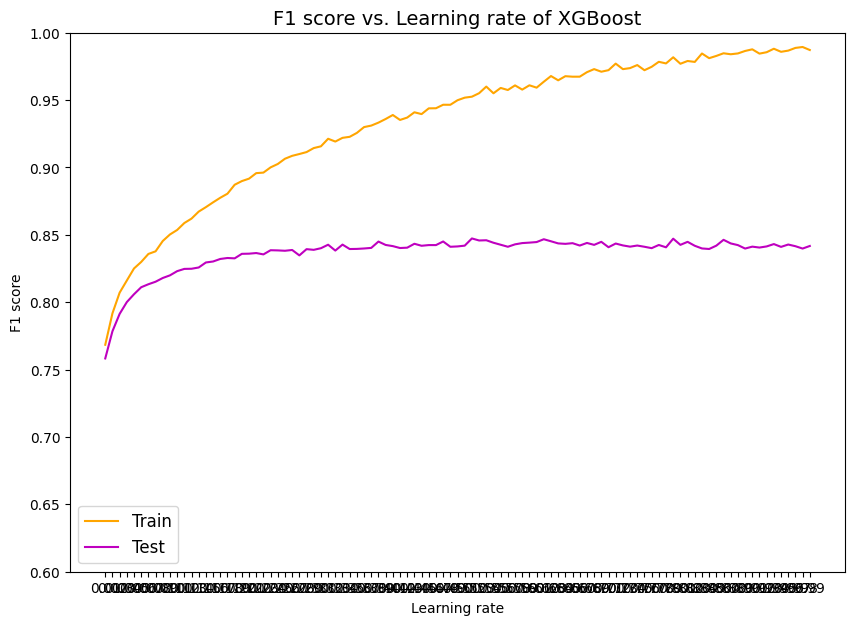

In [43]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('F1 score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('F1 score vs. Learning rate of XGBoost', size=14)
plt.show()

In [44]:
xgb_classifier = xgb.XGBClassifier(eta = 0.3)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sd_df, y_train)

# fit the model
xgb_classifier.fit(X_train_resampled, y_train_resampled)


print(f"Classification report XGBoost test : {classification_report(y_valid, xgb_classifier.predict(X_valid_sd_df))}")


Classification report XGBoost test :               precision    recall  f1-score   support

           0       0.92      0.88      0.90      6875
           1       0.15      0.22      0.18       650

    accuracy                           0.82      7525
   macro avg       0.54      0.55      0.54      7525
weighted avg       0.86      0.82      0.84      7525



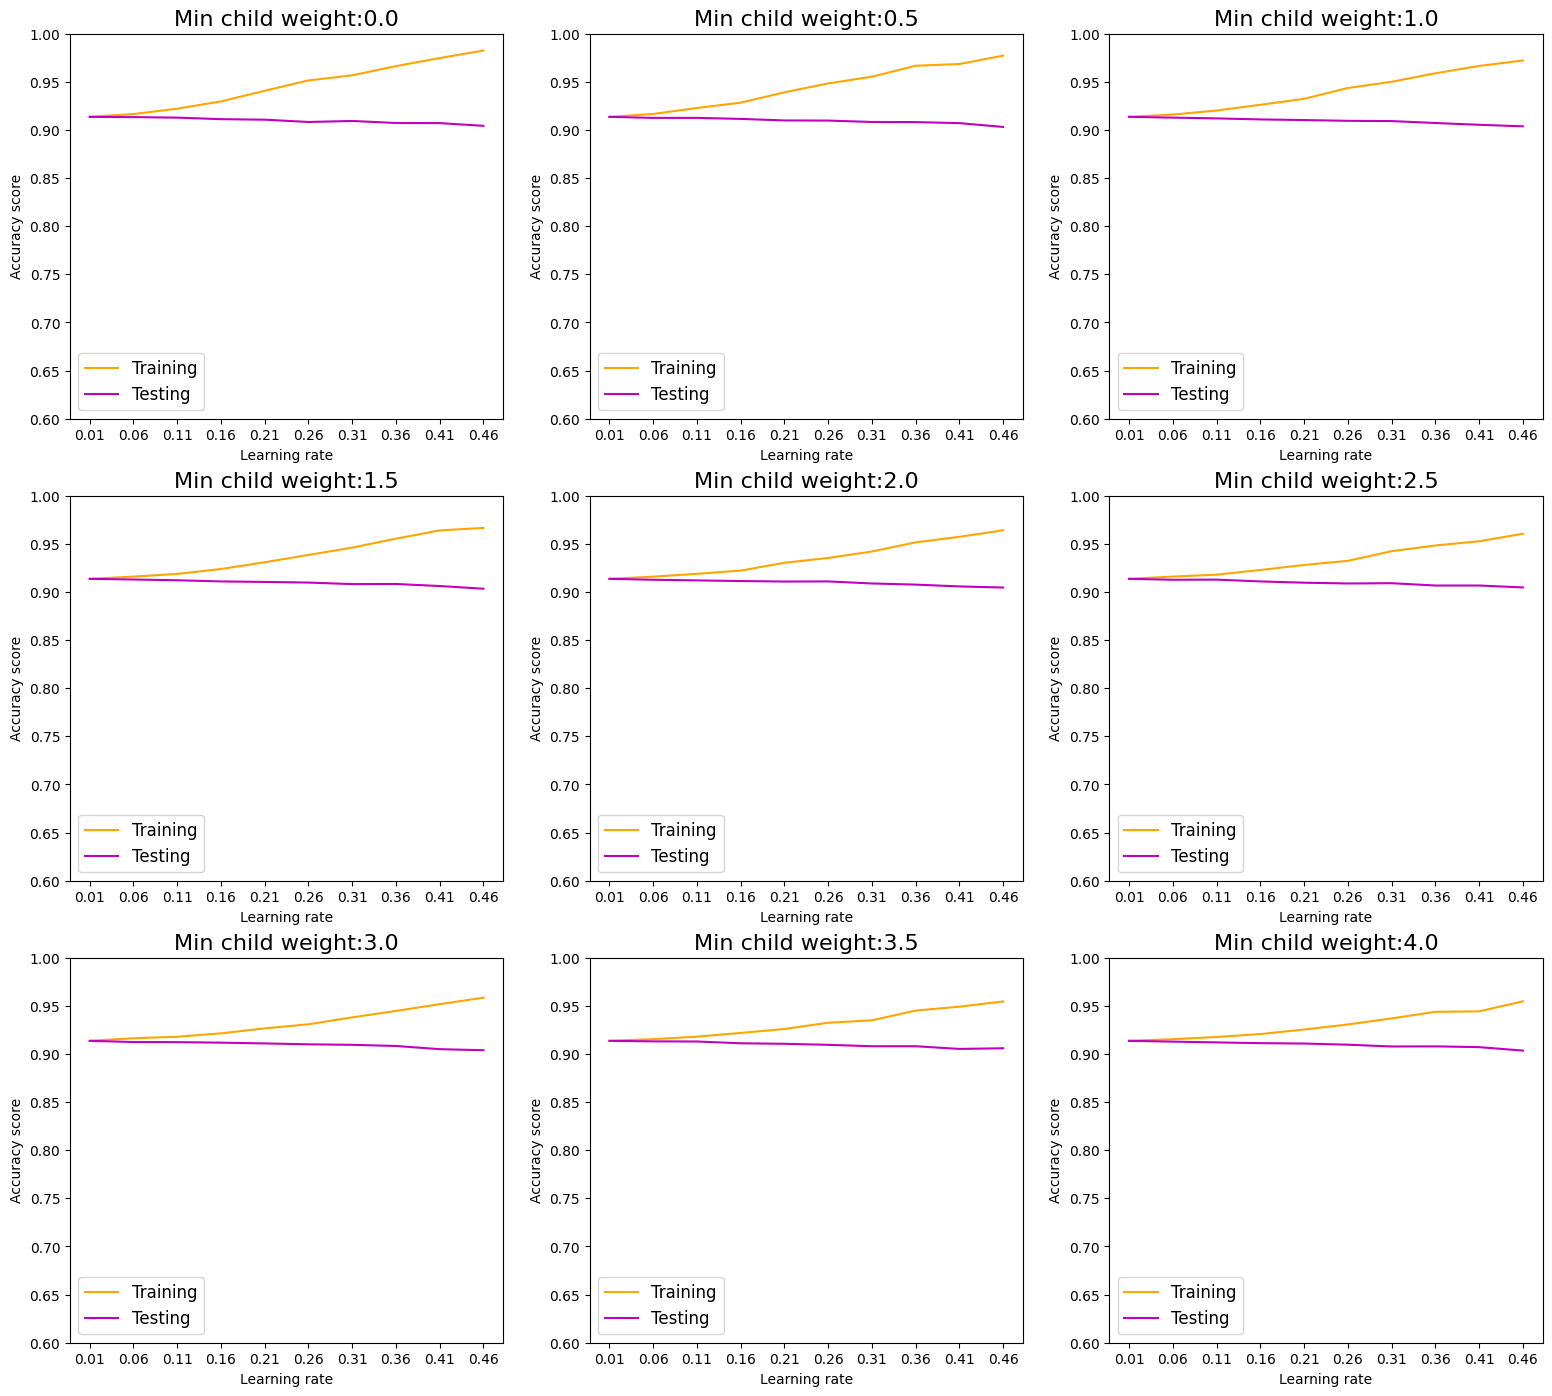

In [45]:
# new learning rate range
learning_rate_range = np.arange(0.01, 0.5, 0.05)
fig = plt.figure(figsize=(19, 17))
idx = 1
# grid search for min_child_weight
for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(X_train_sd_df, y_train)
        train.append(xgb_classifier.score(X_train_sd_df, y_train))
        test.append(xgb_classifier.score(X_valid_sd_df, y_valid_df))
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()

<div style="background-color:#934bd6; padding: 10px">
<h2>Prédiction avec le meilleur modèle</h2>
</div>

In [46]:
reg_log_prediction_valid = logreg.predict(X_valid_sd_df)
reg_log_prediction_train = logreg.predict(X_train_sd_df)

In [47]:
reg_log_prediction_valid

array([0, 0, 0, ..., 1, 1, 0])

In [48]:
reg_log_prediction = np.concatenate([reg_log_prediction_train, reg_log_prediction_valid])
reg_log_prediction

array([0, 1, 0, ..., 1, 1, 0])

In [49]:
x_final = pd.concat([X_train, X_valid])

In [50]:
y_final = pd.concat([y_train_df, y_valid_df])

In [51]:
x_final['CIBLE']= y_final

In [52]:
x_final['prediction']= reg_log_prediction

In [53]:
x_final

AGE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  CNT_FAM_MEMBERS  \
24148   34              13      0.797783      0.025846     8.466338e-07   
2353    40               7      0.704561      0.019375     1.342021e-06   
3096    45              20      0.742291      0.021704     5.761564e-07   
21205   44              16      0.774867      0.030820     1.391343e-06   
21152   45               2      0.721692      0.026002     1.214441e-06   
...    ...             ...           ...           ...              ...   
14506   52               6      0.682961      0.039202     7.588453e-06   
12302   31               2      0.665990      0.045048     5.919910e-06   
5911    51               1      0.791538      0.023141     1.680012e-06   
2288    26               5      0.730596      0.047565     5.873901e-06   
339     43              21      0.639275      0.031964     6.313830e-06   

       MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  FLAG_DOCUMENT_3  \
24148            0.571478      0.190493          0.680131                1   
2353             0.704561      0.082534          0.162145                1   
3096             0.648176      0.168526          0.457002                0   
21205            0.626104      0.081394          0.593135                1   
21152            0.623008      0.300574          0.198289                1   
...                   ...           ...               ...              ...   
14506            0.682961      0.256110          0.574391                1   
12302            0.665990      0.332995          0.345486                1   
5911             0.567004      0.226802          0.157273                1   
2288             0.660814      0.165203          0.492649                1   
339              0.639275      0.426184          0.738197                0   

       FLAG_DOCUMENT_6  ...  TYPE_REVENUS_Working  GENRE_M  \
24148                0  ...                     0        0   
2353                 0  ...                     1        0   
3096                 0  ...                     0        1   
21205                0  ...                     1        0   
21152                0  ...                     0        1   
...                ...  ...                   ...      ...   
14506                0  ...                     1        0   
12302                0  ...                     1        0   
5911                 0  ...                     0        0   
2288                 0  ...                     1        0   
339                  0  ...                     0        1   

       NIVEAU_EDUCATION_Higher education  NIVEAU_EDUCATION_Incomplete higher  \
24148                                  0                                   1   
2353                                   0                                   0   
3096                                   0                                   0   
21205                                  1                                   0   
21152                                  0                                   0   
...                                  ...                                 ...   
14506                                  0                                   0   
12302                                  0                                   0   
5911                                   0                                   0   
2288                                   0                                   0   
339                                    1                                   0   

       NIVEAU_EDUCATION_Lower secondary  \
24148                                 0   
2353                                  0   
3096                                  0   
21205                                 0   
21152                                 0   
...                                 ...   
14506                                 0   
12302                                 0   
5911                                  0   
2288                             

<div style="background-color:#934bd6; padding: 10px">
<h2>Evidently - Data Drift</h2>
</div>

Le but est de détecter un changement dans les données afin de réadapter notre modèle. 

In [54]:
column_mapping = ColumnMapping()

column_mapping.target = "CIBLE"
column_mapping.prediction = 'prediction'
column_mapping.numerical_features = ['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
        'nbr_membre']
column_mapping.categorical_features = ['SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRAT_Revolving loans',
       'STATUT_FAMILIAL_Married', 'STATUT_FAMILIAL_Separated',
       'STATUT_FAMILIAL_Single / not married', 'STATUT_FAMILIAL_Widow',
       'PROPRIETAIRE_BIEN_IMMO_Y', 'TYPE_REVENUS_Maternity leave',
       'TYPE_REVENUS_State servant', 'TYPE_REVENUS_Working', 'GENRE_M',
       'NIVEAU_EDUCATION_Higher education',
       'NIVEAU_EDUCATION_Incomplete higher',
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y']

In [55]:
#pour evidently 
df_referente = x_final.iloc[:24600, :]
df_current = x_final.iloc[24601:, :]

In [56]:
regression_perfomance = Report(metrics=[ClassificationPreset()])
regression_perfomance.run(current_data=df_referente, reference_data=df_current, column_mapping=column_mapping)

In [57]:
regression_perfomance.show()

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Pipeline</b>
    </h2>
</div>


In [58]:
# Créer les transformateurs
#numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"))



#preprocessor_1 = ColumnTransformer(
 #   transformers=[
  #      ("num", numeric_transformer, col_num)],
   # remainder="drop")



pipeline = Pipeline(
    steps=[
        ("sampler", RandomUnderSampler()),
        ("logreg", LogisticRegression()),
    ]
)

In [59]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [60]:
param_grid = {

    "estimator": [RandomForestClassifier()], 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
     # LogisticRegression(), DummyClassifier(),
    #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'],
    #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'],
    #'estimator__C': [0.1, 1.0, 10.0]
    "estimator__n_estimators" : [100, 200, 300, 500]
}

param_grid

{'estimator': [RandomForestClassifier()],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8],
 'estimator__n_estimators': [100, 200, 300, 500]}

In [61]:
from sklearn.metrics import get_scorer_names # mettre en haut

In [62]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [63]:
# grid_1 = GridSearchCV(
#    pipeline,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     return_train_score=True,
#     verbose=2,
#     scoring="f1",
# )
# grid_1

In [64]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logreg__solver': ['lbfgs', 'saga'],
    'logreg__l1_ratio': [None, 0.5]  # Only used for 'elasticnet' penalty
}

# Set up GridSearchCV
grid_1 = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampler', RandomUnderSampler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.1, 1, 10, 100],
                         'logreg__l1_ratio': [None, 0.5],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'logreg__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [65]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(X_train_sd_df, y_train_df)

Pipeline Steps: {'sampler': RandomUnderSampler(), 'logreg': LogisticRegression()}
Fitting 5 folds for each of 64 candidates, totalling 320 fits


d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


180 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projet\P0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampler', RandomUnderSampler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.1, 1, 10, 100],
                         'logreg__l1_ratio': [None, 0.5],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'logreg__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [66]:
from joblib import dump,load
dump(grid_1, "model_lg.joblib")
model_reg_log = load("model_lg.joblib")
model_reg_log

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampler', RandomUnderSampler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.1, 1, 10, 100],
                         'logreg__l1_ratio': [None, 0.5],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'logreg__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [67]:
resultize(grid_1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
26       0.102816      0.005482         0.009615        0.001554   
58       0.099383      0.005692         0.008717        0.002776   
50       0.110092      0.014122         0.009324        0.002503   
18       0.112588      0.010808         0.010930        0.002235   
34       0.093305      0.003999         0.007609        0.000843   
..            ...           ...              ...             ...   
55       0.033315      0.007677         0.000000        0.000000   
56       0.034512      0.005961         0.000000        0.000000   
60       0.030911      0.002749         0.000000        0.000000   
62       0.031137      0.002850         0.000000        0.000000   
63       0.031125      0.003882         0.000000        0.000000   

    param_logreg__C param_logreg__l1_ratio param_logreg__penalty  \
26              1.0                    0.5                    l2   
58            100.0                    0.5                    l2   
50            100.0                   None                    l2   
18              1.0                   None                    l2   
34             10.0                   None                    l2   
..              ...                    ...                   ...   
55            100.0                   None                  none   
56            100.0                    0.5                    l1   
60            100.0                    0.5            elasticnet   
62            100.0                    0.5                  none   
63            100.0                    0.5                  none   

   param_logreg__solver                                             params  \
26                lbfgs  {'logreg__C': 1, 'logreg__l1_ratio': 0.5, 'log...   
58                lbfgs  {'logreg__C': 100, 'logreg__l1_ratio': 0.5, 'l...   
50                lbfgs  {'logreg__C': 100, 'logreg__l1_ratio': None, '...   
18                lbfgs  {'logreg__C': 1, 'logreg__l1_ratio': None, 'lo...   
34                lbfgs  {'logreg__C': 10, 'logreg__l1_ratio': None, 'l...   
..                  ...                                                ...   
55                 saga  {'logreg__C': 100, 'logreg__l1_ratio': None, '...   
56                lbfgs  {'logreg__C': 100, 'logreg__l1_ratio': 0.5, 'l...   
60                lbfgs  {'logreg__C': 100, 'logreg__l1_ratio': 0.5, 'l...   
62                lbfgs  {'logreg__C': 100, 'logreg__l1_ratio': 0.5, 'l...   
63                 saga  {'logreg__C': 100, 'logreg__l1_ratio': 0.5, 'l...   

    mean_test_score  std_test_score  rank_test_score  
26         0.653833        0.006201                1  
58         0.653719        0.007193                2  
50         0.652808        0.004159                3  
18         0.652124        0.007448                4  
34         0.651327        0.006725                5  
..              ...             ...              ...  
55              NaN             NaN               29  
56              NaN             NaN               29  
60              NaN             NaN               29  
62              NaN             NaN               29  
63              NaN             NaN               29  

[64 rows x 12 columns]

In [68]:
best_model = grid_1.best_estimator_

best_model

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('logreg', LogisticRegression(C=1, l1_ratio=0.5))])

## SHAP VALUES

In [69]:
df

AGE  ID_CLIENT  CIBLE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  \
0       47     196888      0               0     1350000.0       39604.5   
1       54     101392      0               2      573628.5       24435.0   
2       25     435135      0               2      298512.0       19948.5   
3       29     396314      0               5      218016.0       17352.0   
4       44     341153      1               0     1006920.0       42790.5   
...    ...        ...    ...             ...           ...           ...   
25141   33     332801      0              15      992556.0       29151.0   
25142   41     351130      0               5      117162.0       11718.0   
25143   41     311641      0               3      808650.0       23773.5   
25144   37     151728      1              20       85500.0        9108.0   
25145   58     389739      0               3     1288350.0       37053.0   

       CNT_FAM_MEMBERS  MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  \
0                  2.0           1350000.0      135000.0          0.761443   
1                  2.0            463500.0       81000.0          0.396825   
2                  1.0            270000.0      112500.0          0.385353   
3                  2.0            180000.0       81000.0          0.545649   
4                  2.0            900000.0       90000.0          0.444443   
...                ...                 ...           ...               ...   
25141              1.0            711000.0      135000.0          0.441798   
25142              1.0            103500.0      144000.0          0.342067   
25143              3.0            675000.0       90000.0          0.621768   
25144              1.0             85500.0       40500.0          0.393861   
25145              1.0           1125000.0      148500.0          0.670388   

       ...  TYPE_REVENUS_Maternity leave  TYPE_REVENUS_State servant  \
0      ...                             0                           0   
1      ...                             0                           0   
2      ...                             0                           0   
3      ...                             0                           0   
4      ...                             0                           0   
...    ...                           ...                         ...   
25141  ...                             0                           0   
25142  ...                             0                           0   
25143  ...                             0                           1   
25144  ...                             0                           0   
25145  ...                             0                           0   

       TYPE_REVENUS_Working  GENRE_M  NIVEAU_EDUCATION_Higher education  \
0                         1        0                                  1   
1                         1        0                                  1   
2                         1        0                                  1   
3                         1        1                                  1   
4                         1        0                                  0   
...                     ...      ...                                ...   
25141                     1        1                                  0   
25142                     1        0                                  0   
25143                     0        0                                  0   
25144                     1        1                                  0   
25145                     1        0                                  0   

       NIVEAU_EDUCATION_Incomplete higher  NIVEAU_EDUCATION_Lower secondary  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0

In [70]:
index_value = df.loc[df['ID_CLIENT'] == 196888].index[0]

index_value

np.int64(0)

In [71]:
X_train_sd_df

AGE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  CNT_FAM_MEMBERS  \
24148   34              13      0.797783      0.025846     8.466338e-07   
2353    40               7      0.704561      0.019375     1.342021e-06   
3096    45              20      0.742291      0.021704     5.761564e-07   
21205   44              16      0.774867      0.030820     1.391343e-06   
21152   45               2      0.721692      0.026002     1.214441e-06   
...    ...             ...           ...           ...              ...   
6671    28               6      0.763840      0.039205     3.148624e-06   
610     38               9      0.707618      0.048161     4.506334e-06   
16094   35               2      0.699855      0.028546     9.331396e-07   
11426   52              10      0.748782      0.021981     6.758080e-07   
4192    36               3      0.791139      0.028661     7.490938e-06   

       MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  FLAG_DOCUMENT_3  \
24148            0.571478      0.190493          0.680131                1   
2353             0.704561      0.082534          0.162145                1   
3096             0.648176      0.168526          0.457002                0   
21205            0.626104      0.081394          0.593135                1   
21152            0.623008      0.300574          0.198289                1   
...                   ...           ...               ...              ...   
6671             0.637596      0.092097          0.038375                1   
610              0.537380      0.456266          0.751841                1   
16094            0.699855      0.139971          0.610228                0   
11426            0.653844      0.106440          0.544797                1   
4192             0.556202      0.252819          0.776740                1   

       FLAG_DOCUMENT_6  ...  TYPE_REVENUS_Maternity leave  \
24148                0  ...                             0   
2353                 0  ...                             0   
3096                 0  ...                             0   
21205                0  ...                             0   
21152                0  ...                             0   
...                ...  ...                           ...   
6671                 0  ...                             0   
610                  0  ...                             0   
16094                0  ...                             0   
11426                0  ...                             0   
4192                 0  ...                             0   

       TYPE_REVENUS_State servant  TYPE_REVENUS_Working  GENRE_M  \
24148                           1                     0        0   
2353                            0                     1        0   
3096                            1                     0        1   
21205                           0                     1        0   
21152                           0                     0        1   
...                           ...                   ...      ...   
6671                            0                     1        0   
610                             0                     0        1   
16094                           0                     1        1   
11426                           0                     1        0   
4192                            0                     0        0   

       NIVEAU_EDUCATION_Higher education  NIVEAU_EDUCATION_Incomplete higher  \
24148                                  0                                   1   
2353                                   0                                   0   
3096                                   0                                   0   
21205                                  1                                   0   
21152                                  0                                   0   
...                                  ...                                 ...   
6671                                   0                   

In [72]:
explainer = shap.Explainer(
    logreg, X, feature_names=X.columns
)
shap_values = explainer(X)

In [73]:
import joblib




joblib.load('test_shap.joblib')

.values =
array([[-1.74341789e-01,  3.94765289e-01,  3.82447786e-02, ...,
         2.63923674e+00,  2.31531409e-01,  1.79325293e-09],
       [-3.44549951e-01,  2.58639328e-01,  2.66550519e-01, ...,
         2.63923674e+00, -4.49443323e-01,  9.36246231e-10],
       [ 3.60598150e-01,  2.58639328e-01,  6.61456512e-02, ...,
         2.63923674e+00,  2.31531409e-01,  2.33604278e-09],
       ...,
       [-2.84490786e-02,  1.90576347e-01,  2.39396715e-01, ...,
        -1.18574404e+00,  2.31531409e-01,  3.70756818e-10],
       [ 6.88127285e-02, -9.66494329e-01, -8.47799782e-02, ...,
        -1.18574404e+00,  2.31531409e-01,  2.33604278e-09],
       [-4.41811758e-01,  1.90576347e-01,  1.90499457e-01, ...,
        -1.18574404e+00, -4.49443323e-01,  2.33604278e-09]])

.base_values =
array([-0.98603981, -0.98603981, -0.98603981, ..., -0.98603981,
       -0.98603981, -0.98603981])

.data =
array([[4.70000000e+01, 0.00000000e+00, 7.05194657e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.2236641

In [76]:
test=shap_values[index_value]
test

.values =
array([-1.74341789e-01,  3.94765289e-01,  3.82447786e-02, -4.25415970e-02,
        4.66907001e-09, -9.22474726e-02, -2.57846181e-01, -6.04822051e-01,
       -3.52252124e-01, -0.00000000e+00,  1.68558478e-01,  4.50433671e-01,
       -5.08023611e-01,  1.16938541e-01,  2.78681789e-01,  8.06817347e-02,
       -1.34033767e-01, -0.00000000e+00,  1.20232461e-01, -8.26329414e-02,
        5.77785882e-02, -3.83830884e+00,  3.72869068e-01,  5.68812115e-02,
        2.63923674e+00,  2.31531409e-01,  1.79325293e-09])

.base_values =
np.float64(-0.9860398134282038)

.data =
array([4.70000000e+01, 0.00000000e+00, 7.05194657e-01, 2.06880606e-02,
       1.04473283e-06, 7.05194657e-01, 7.05194657e-02, 7.61443102e-01,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00

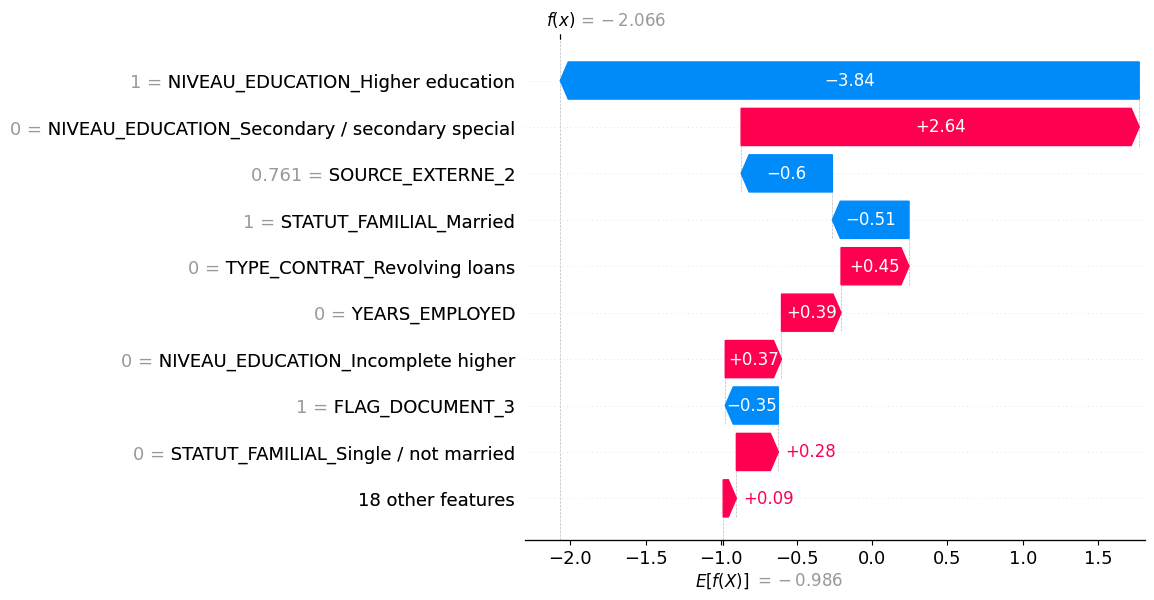

In [77]:
shap.plots.waterfall(test)

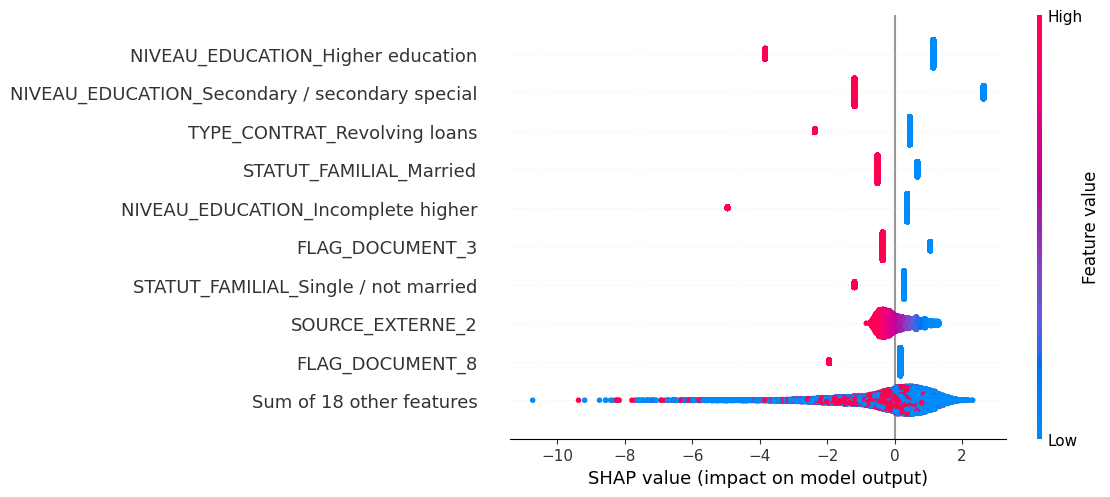

In [78]:
shap.plots.beeswarm(shap_values)

## Feature Importance

In [79]:
est = pipeline.steps[-1]
est = est[1]
est

LogisticRegression()

In [80]:
preprocessor = pipeline[:-1]
preprocessor

Pipeline(steps=[('sampler', RandomUnderSampler())])

In [81]:
feature_names_out = preprocessor.get_feature_names_out()
feature_names_out

d:\Projet\P07\P07_Implementez_outils_scoring\p7-ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



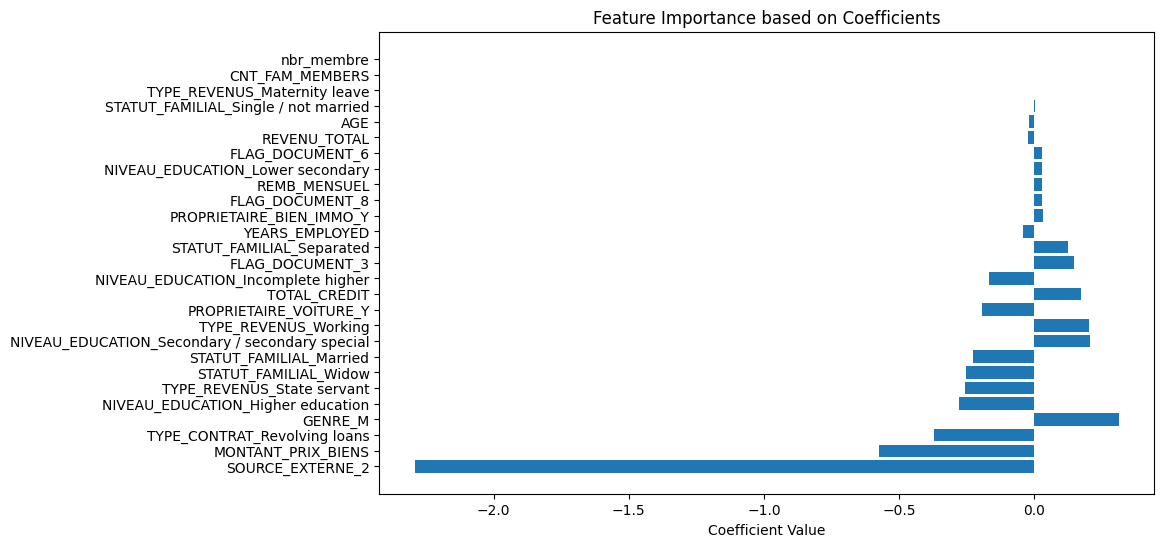

In [82]:

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Récupération des coefficients du modèle
importance = model.coef_[0]  # Coefficients pour la régression logistique binaire
feature_names = X_train.columns  # Assurez-vous que X_train est un DataFrame
feature_importance = dict(zip(feature_names, importance))


feature_importance = dict(zip(feature_names, importance))
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

features, importance_values = zip(*sorted_features)

plt.figure(figsize=(10, 6))
plt.barh(features, importance_values)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')
plt.show()

In [151]:
# feature_imp_dict = {k: v for k, v in zip(feature_names_out, feat_imp)}
# feature_imp_dict

feature_importance

{'AGE': np.float64(-0.01951436878553644),
 'YEARS_EMPLOYED': np.float64(-0.04212836876888806),
 'TOTAL_CREDIT': np.float64(0.17251746722767222),
 'REMB_MENSUEL': np.float64(0.028962310215857153),
 'CNT_FAM_MEMBERS': np.float64(-4.7787255868296975e-06),
 'MONTANT_PRIX_BIENS': np.float64(-0.5756416736527575),
 'REVENU_TOTAL': np.float64(-0.022510854298608794),
 'SOURCE_EXTERNE_2': np.float64(-2.2920491978105972),
 'FLAG_DOCUMENT_3': np.float64(0.14822936488474503),
 'FLAG_DOCUMENT_6': np.float64(0.027480570663682622),
 'FLAG_DOCUMENT_8': np.float64(0.02955437136198664),
 'TYPE_CONTRAT_Revolving loans': np.float64(-0.37110597715252125),
 'STATUT_FAMILIAL_Married': np.float64(-0.2273191957024223),
 'STATUT_FAMILIAL_Separated': np.float64(0.12345935746281447),
 'STATUT_FAMILIAL_Single / not married': np.float64(0.004090770537436031),
 'STATUT_FAMILIAL_Widow': np.float64(-0.2534374727168828),
 'PROPRIETAIRE_BIEN_IMMO_Y': np.float64(0.033365822214103315),
 'TYPE_REVENUS_Maternity leave': np.f

In [167]:
# Recupere la feat importance, créé un pd.Serie et on filtre
feature_imp_ser = pd.Series(feature_importance)
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)
feature_imp_ser = feature_imp_ser[feature_imp_ser > 0.01]
feature_imp_ser = feature_imp_ser.round(4)



feature_imp_ser.to_dict()
feature_imp_ser.keys().tolist()

pandas.core.series.Series

In [ ]:
# save la feat importance

dump(feature_imp_ser, "feat_importances.joblib")
dump(explainer, "explainer.joblib")
dump(shap_values, "shap_values.joblib")
dump(X,"client.joblib")

featuretmp = load('feat_importances.joblib')
explainertmp = load('explainer.joblib')
shap_valuestmp = load('shap_values.joblib')
clienttmp = load('client.joblib')





featuretmp


NameError: name 'dump' is not defined

In [3]:
# shap_imp = pd.Series(shap_valuestmp.values[0])
# shap_imp = shap_imp.sort_values(ascending=False)
# shap_imp = shap_imp[shap_imp > 0.01]
# shap_imp = shap_imp.round(4)
shap_valuestmp
# featuretmp # 11
# shap_imp # 13
# Ensure shap_imp is numeric
# shap_imp = pd.to_numeric(shap_imp, errors='coerce')

# # Check that featuretmp and shap_imp have the same length
# assert len(featuretmp) == len(shap_imp), "Lengths of featuretmp and shap_imp must match"

# # Create the DataFrame
# shap_df = pd.DataFrame({
#     "Feature": featuretmp,
#     "SHAP Value": shap_imp
# })



NameError: name 'shap_valuestmp' is not defined

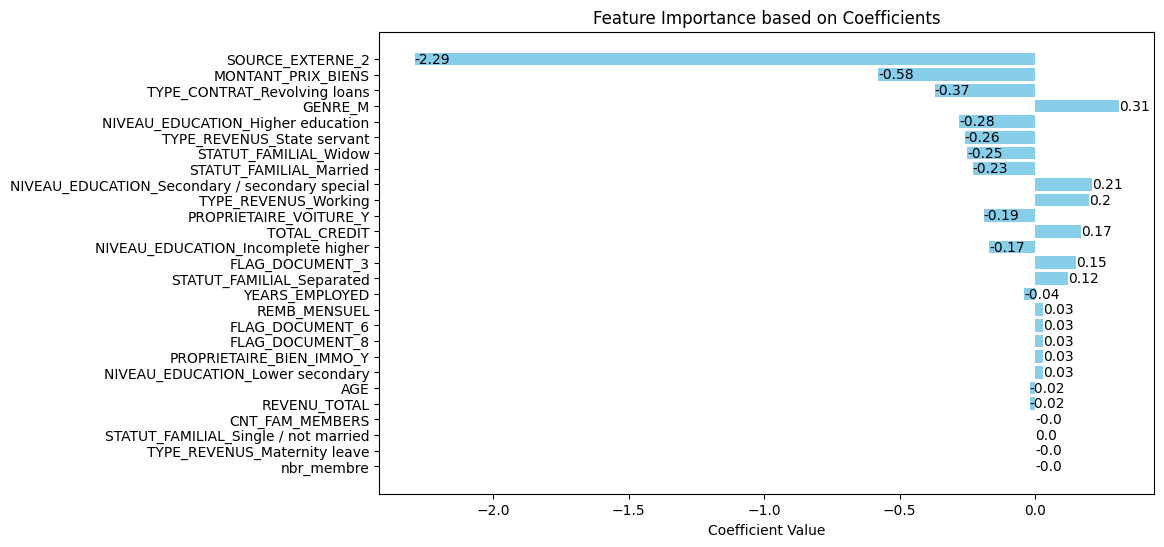

In [87]:
# Arrondi des coefficients à 2 décimales
rounded_feature_importance = {k: round(v, 2) for k, v in feature_importance.items()}

# Trier les caractéristiques par la valeur absolue de l'importance
sorted_features = sorted(rounded_feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Séparer les caractéristiques et leurs valeurs
features, importance_values = zip(*sorted_features)

# Tracer le graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_values, color='skyblue')  # Utilisation de 'barh' pour des barres horizontales

# Inverser l'axe des ordonnées pour que les barres les plus importantes soient en haut
plt.gca().invert_yaxis()

# Ajouter des étiquettes et un titre
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')

# Ajouter les étiquettes des valeurs au-dessus des barres
for index, bar in enumerate(bars):  
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(importance_values[index]), 
             va='center', ha='left')

# Afficher le graphique
plt.show()



In [88]:
y_pred_proba_list = grid_1.predict_proba(X)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]


y_pred_rf_proba = grid_1.predict_proba(X)

y_pred_proba_list

y_pred_rf_proba

array([[0.76529391, 0.23470609],
       [0.57089529, 0.42910471],
       [0.40529205, 0.59470795],
       ...,
       [0.67396034, 0.32603966],
       [0.4467116 , 0.5532884 ],
       [0.64879583, 0.35120417]])

ValueError: All arrays must be of the same length

Client numero :  28
Model Prediction : Classe 0.6937
Il y a 30.6% de risques que le client ait des difficultés de paiement
________________________________________________________________________________


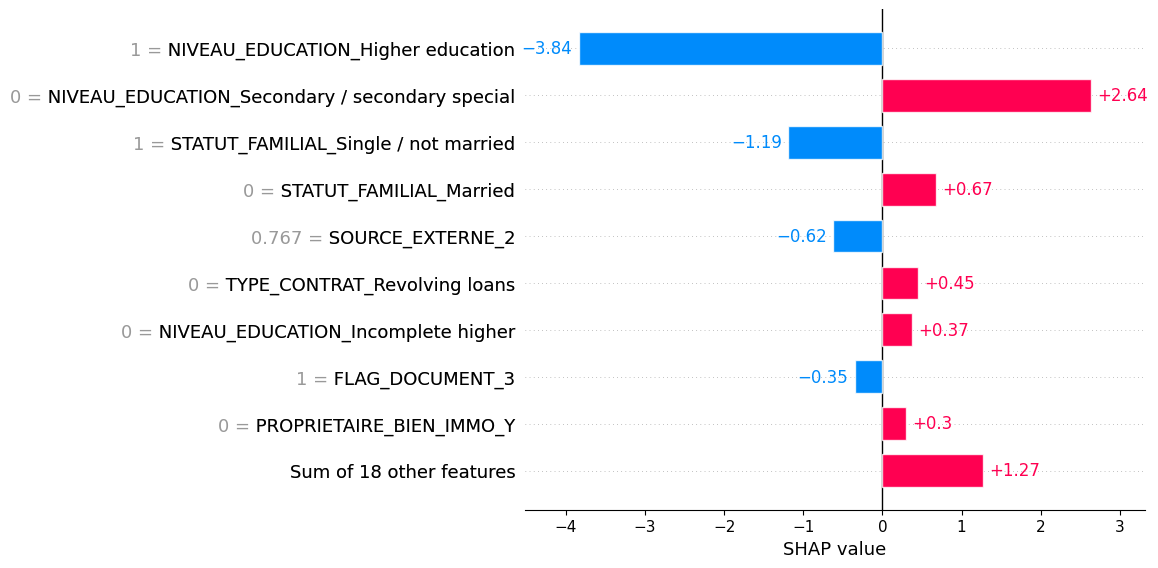

In [147]:
# Initialiser les graphiques interactifs
shap.initjs()

# Indice pour l'échantillon
idx = 848  # Exemple : le premier client

# Afficher les informations sur le client
print("Client numero : ", clienttmp.iloc[idx, 0])
print("Model Prediction : Classe", y_pred_proba_list[idx])
print(f"Il y a {y_pred_rf_proba[idx][1]:.1%} de risques que le client ait des difficultés de paiement")
print("__" * 40)

# Extraire les valeurs SHAP pour le client
client_shap_values = shap_valuestmp[idx]  # Assurez-vous que shap_values est bien un array ou Explanation


shap.plots.bar(client_shap_values)
# Tracer le graphique SHAP pour le client
# shap.force_plot(
#     base_value=explainertmp.expected_value,  # Valeur moyenne attendue
#     shap_values=client_shap_values.values if isinstance(client_shap_values, shap.Explanation) else client_shap_values,  # Convertir si nécessaire
#     features=clienttmp.iloc[idx, :],  # Caractéristiques du client
#     feature_names=featuretmp.keys().tolist()  # Noms des caractéristiques
# )



## Travaille sur Shap

In [92]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(
        x_train_after_preprocess, columns=feat_name_out
    )

    return x_train_after_preprocess



def extract_est(pipe) : 
    return pipe.steps[-1][1]





In [93]:
# x_train_after_preprocess = build_x_train_preprocessor(grid_1, X_train)
# x_train_after_preprocess

In [94]:
# x_train_after_preprocess.shape

In [95]:
# x_train_after_preprocess_sample=x_train_after_preprocess.sample(frac=0.1)

In [96]:
# explainer = shap.TreeExplainer(est, x_train_after_preprocess_sample)
# explainer

In [97]:
#explainer.__dict__.keys()


In [98]:
dump(explainer, "explainer.joblib")


['explainer.joblib']

In [99]:
[i for i in explainer.__dir__() if "__" not in i]

['model',
 'output_names',
 'feature_names',
 'masker',
 'link',
 'linearize_link',
 'feature_perturbation',
 'nsamples',
 'coef',
 'intercept',
 'mean',
 'expected_value',
 'M',
 '_estimate_transforms',
 '_parse_model',
 'supports_model_with_masker',
 'explain_row',
 'shap_values',
 '_compute_main_effects',
 'save',
 'load',
 '_instantiated_load']

In [100]:
def shapeit(i, explainer, x_train_after_preprocess):
    """take x_train_after_preprocess and i and give back shap values"""

    val_ = explainer.shap_values(x_train_after_preprocess.iloc[i])
    val_ = pd.DataFrame(
        val_, index=x_train_after_preprocess.columns, columns=["TRUE", "FALSE"]
    )
    val_ = val_.iloc[:, 0].sort_values(ascending=False).head(15)

    return val_.round(4).to_dict()

In [103]:
explainer.__dict__.keys()

dict_keys(['model', 'output_names', 'feature_names', 'masker', 'link', 'linearize_link', 'feature_perturbation', 'nsamples', 'coef', 'intercept', 'mean', 'expected_value', 'M'])

In [104]:
# x_train_after_preprocess_sample.iloc[:100]

In [105]:
# x_train_sample = x_train_after_preprocess_sample.sample(n=1000, random_state=42)


In [106]:
# shap_values = explainer.shap_values(x_train_sample)
# shap_values

In [107]:
# Récupération des noms des colonnes
# feature_names = x_train_sample.columns
# feature_names

In [110]:
import pickle as pk

with open("shap.pk", "wb") as f : 
    pk.dump(shap_values, f)

## Test shap values for one id

In [111]:
# x_train_sample.iloc[10, :]

In [112]:
# x_train_sample.isna().sum().sum()

In [113]:
# x_train_sample

In [114]:
2460*2

4920

In [117]:
4920/2

2460.0

In [118]:
# x_train_after_preprocess.iloc[2400].to_dict()

In [119]:
# x_train

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [120]:
# y_pred = notre prediction finale 'oui ou non'
# y_true = CIBLE

In [121]:
# def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet
#            return total_credit * taux_interet
#        if  y_true ==1 :
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé


def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):
    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [122]:
calcul_benef(1000, 0, 0)

40.0

In [123]:
calcul_benef(1000, 1, 0)

-1000

In [124]:
calcul_benef(1000, 1, 1)

0

In [125]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row["CIBLE"] == 1:  # cas où on refuse le crédit
        return pd.Series(
            {"benef": 0, "pertes": -row["TOTAL_CREDIT"] * 0.25}
        )  # Pertes avec un signe négatif
    else:
        if row["CIBLE"] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row["TOTAL_CREDIT"] * taux_interet
            return pd.Series({"benef": benef, "pertes": 0})
        else:
            pertes = (
                -row["TOTAL_CREDIT"] * 0.25
            )  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({"benef": 0, "pertes": pertes})

In [126]:
df[["benef", "pertes"]] = df.apply(calcul_benef_bis, axis=1)

In [127]:
df[["TOTAL_CREDIT", "CIBLE", "benef", "pertes"]]

TOTAL_CREDIT  CIBLE     benef    pertes
0         1350000.0      0  54000.00       0.0
1          573628.5      0  22945.14       0.0
2          298512.0      0  11940.48       0.0
3          218016.0      0   8720.64       0.0
4         1006920.0      1      0.00 -251730.0
...             ...    ...       ...       ...
25141      992556.0      0  39702.24       0.0
25142      117162.0      0   4686.48       0.0
25143      808650.0      0  32346.00       0.0
25144       85500.0      1      0.00  -21375.0
25145     1288350.0      0  51534.00       0.0

[25083 rows x 4 columns]

In [128]:
df

AGE  ID_CLIENT  CIBLE  YEARS_EMPLOYED  TOTAL_CREDIT  REMB_MENSUEL  \
0       47     196888      0               0     1350000.0       39604.5   
1       54     101392      0               2      573628.5       24435.0   
2       25     435135      0               2      298512.0       19948.5   
3       29     396314      0               5      218016.0       17352.0   
4       44     341153      1               0     1006920.0       42790.5   
...    ...        ...    ...             ...           ...           ...   
25141   33     332801      0              15      992556.0       29151.0   
25142   41     351130      0               5      117162.0       11718.0   
25143   41     311641      0               3      808650.0       23773.5   
25144   37     151728      1              20       85500.0        9108.0   
25145   58     389739      0               3     1288350.0       37053.0   

       CNT_FAM_MEMBERS  MONTANT_PRIX_BIENS  REVENU_TOTAL  SOURCE_EXTERNE_2  \
0                  2.0           1350000.0      135000.0          0.761443   
1                  2.0            463500.0       81000.0          0.396825   
2                  1.0            270000.0      112500.0          0.385353   
3                  2.0            180000.0       81000.0          0.545649   
4                  2.0            900000.0       90000.0          0.444443   
...                ...                 ...           ...               ...   
25141              1.0            711000.0      135000.0          0.441798   
25142              1.0            103500.0      144000.0          0.342067   
25143              3.0            675000.0       90000.0          0.621768   
25144              1.0             85500.0       40500.0          0.393861   
25145              1.0           1125000.0      148500.0          0.670388   

       ...  TYPE_REVENUS_Working  GENRE_M  NIVEAU_EDUCATION_Higher education  \
0      ...                     1        0                                  1   
1      ...                     1        0                                  1   
2      ...                     1        0                                  1   
3      ...                     1        1                                  1   
4      ...                     1        0                                  0   
...    ...                   ...      ...                                ...   
25141  ...                     1        1                                  0   
25142  ...                     1        0                                  0   
25143  ...                     0        0                                  0   
25144  ...                     1        1                                  0   
25145  ...                     1        0                                  0   

       NIVEAU_EDUCATION_Incomplete higher  NIVEAU_EDUCATION_Lower secondary  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0   
4                                       0                                 0   
...                                   ...                               ...   
25141                                   0                                 0   
25142                                   0                                 0   
25143                                   0                                 0   
25144                                   0                                 0   
25145                                   0                                 0   

       NIVEAU_EDUCATION_Secondary / secondary special  PROPRIETAIRE_VOITURE_Y  \
0                                                   0                       0   
1                                                   0                       1   
2   

In [129]:
y_pred_list = grid_1.predict(X)
y_pred_list

array([0, 0, 1, ..., 0, 1, 0])

In [130]:
y_true_list = y.values
y_true_list

array([0, 0, 0, ..., 0, 1, 0])

In [131]:
montant_list = X.loc[:, "TOTAL_CREDIT"].values
montant_list

array([0.70519466, 0.77275027, 0.71345052, ..., 0.76471547, 0.66879166,
       0.75024678])

In [132]:
l1 = ["a", "b"]
l2 = [0, 1]

In [133]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v / 1_000_000, 2)

np.float64(-0.0)

In [134]:
sum(montant_list / 1_000_000).round(2)

np.float64(0.02)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [135]:
y_pred_proba_list = grid_1.predict_proba(X)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

[np.float64(0.7653),
 np.float64(0.5709),
 np.float64(0.4053),
 np.float64(0.5229),
 np.float64(0.4349),
 np.float64(0.272),
 np.float64(0.5398),
 np.float64(0.7744),
 np.float64(0.5667),
 np.float64(0.4585)]

In [136]:
def calcul_pnl_one_complexe(
    montant,
    y_true,
    y_pred_proba,
    taux=0.04,
    default_rate=1,
    threshold=0.5,
):
    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [137]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v / 1_000_000, 2)

np.float64(-0.0)

In [138]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=0.0
    )
round(v / 1_000_000, 2)

np.float64(-0.0)

In [139]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=1
    )
round(v / 1_000_000, 2)

0.0

In [140]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(
            m,
            y_true=y_true,
            y_pred_proba=y_pred_proba,
            threshold=threshold,
            default_rate=default_rate,
            taux=taux,
        )
    pnl_list.append(v)

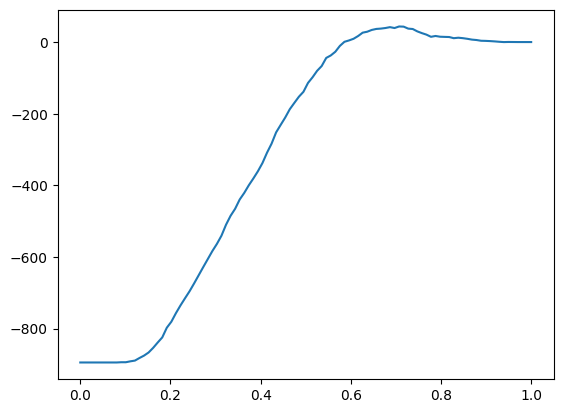

In [141]:
plt.plot(threshold_list, pnl_list)

In [142]:
px.line(x=threshold_list, y=pnl_list)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404, 0.05050505,
                          0.06060606, 0.07070707, 0.08080808, 0.09090909, 0.1010101 , 0.11111111,
                          0.12121212, 0.13131313, 0.14141414, 0.15151515, 0.16161616, 0.17171717,
                          0.18181818, 0.19191919, 0.2020202 , 0.21212121, 0.22222222, 0.23232323,
                          0.24242424, 0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
                          0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434, 0.35353535,
                          0.36363636, 0.37373737, 0.38383838, 0.39393939, 0.4040404 , 0.41414141,
                          0.42424242, 0.43434343, 0.44444444, 0.45454545, 0.46464646, 0.47474747,
                          0.48484848, 0.49494949, 0.50505051, 0.51515152, 0.52525253, 0.53535354,
                          0.54545455, 0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
                          0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465, 0.65656566,
                          0.66666667, 0.67676768, 0.68686869, 0.6969697 , 0.70707071, 0.71717172,
                          0.72727273, 0.73737374, 0.74747475, 0.75757576, 0.76767677, 0.77777778,
                          0.78787879, 0.7979798 , 0.80808081, 0.81818182, 0.82828283, 0.83838384,
                          0.84848485, 0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
                          0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495, 0.95959596,
                          0.96969697, 0.97979798, 0.98989899, 1.        ]),
              'xaxis': 'x',
              'y': array([-8.94707720e+02, -8.94707720e+02, -8.94707720e+02, -8.94707720e+02,
                          -8.94707720e+02, -8.94707720e+02, -8.94707720e+02, -8.94707720e+02,
                          -8.94707720e+02, -8.94010093e+02, -8.94038839e+02, -8.91492288e+02,
                          -8.89419788e+02, -8.82210435e+02, -8.75515395e+02, -8.66857741e+02,
                          -8.53917053e+02, -8.39035558e+02, -8.24731445e+02, -7.97664313e+02,
                          -7.80865513e+02, -7.57001202e+02, -7.35428882e+02, -7.15337390e+02,
                          -6.95742502e+02, -6.73812551e+02, -6.51065520e+02, -6.28310521e+02,
                          -6.05982163e+02, -5.83596435e+02, -5.63602317e+02, -5.40666627e+02,
                          -5.10134129e+02, -4.85159959e+02, -4.65559623e+02, -4.39703553e+02,
                          -4.21273205e+02, -3.99936276e+02, -3.80925157e+02, -3.60794503e+02,
                          -3.37831644e+02, -3.09002197e+02, -2.83762397e+02, -2.52171339e+02,
                          -2.31290621e+02, -2.10674047e+02, -1.87524536e+02, -1.69900579e+02,
                          -1.52649819e+02, -1.38885623e+02, -1.14147046e+02, -9.83368599e+01,
                          -8.02943371e+01, -6.69966758e+01, -4.42886319e+01, -3.73611196e+01,
                          -2.70655851e+01, -1.06816985e+01,  7.39656123e-01,  4.54941384e+00,
                           9.16658990e+00,  1.68301157e+01,  2.62245036e+01,  2.88771757e+01,
                           3.38442818e+01,  3.66641031e+01,  3.75982410e+01,  3.92259956e+01,
                           4.16688266e+01,  3.91582390e+01,  4.35177167e+01,  4.30423235e+01,
                           3.75438320e+01,  3.64399208e+01,  2.98159423e+01,  2.49644374e+01,
                           2.07648080e+01,  1.46880210e+01,  1.70045513e+01,  1.49242161e+01,
                           1.44462209e+01,  1.40598824e+01,  1.08261723e+0

In [143]:
pnl_df = pd.DataFrame({"threshold": threshold_list, "pnl": pnl_list}).sort_values(
    by="pnl", ascending=False
)
pnl_df

threshold         pnl
70   0.707071   43.517717
71   0.717172   43.042323
68   0.686869   41.668827
67   0.676768   39.225996
69   0.696970   39.158239
..        ...         ...
8    0.080808 -894.707720
7    0.070707 -894.707720
1    0.010101 -894.707720
2    0.020202 -894.707720
3    0.030303 -894.707720

[100 rows x 2 columns]

In [144]:
pnl_df.sort_values(by="pnl", ascending=False).head(10)

threshold        pnl
70   0.707071  43.517717
71   0.717172  43.042323
68   0.686869  41.668827
67   0.676768  39.225996
69   0.696970  39.158239
66   0.666667  37.598241
72   0.727273  37.543832
65   0.656566  36.664103
73   0.737374  36.439921
64   0.646465  33.844282

In [145]:
import nbformat

def analyse_pnl(taux=0.04, default_rate=1):
    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(
            montant_list, y_true_list, y_pred_proba_list
        ):
            v += calcul_pnl_one_complexe(
                m,
                y_true=y_true,
                y_pred_proba=y_pred_proba,
                threshold=threshold,
                default_rate=default_rate,
                taux=taux,
            )
        pnl_list.append(v)


fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

ImportError: cannot import name 'encodestring' from 'base64' (C:\Users\acer6\AppData\Local\Programs\Python\Python312\Lib\base64.py)

In [211]:
analyse_pnl(taux=0.04, default_rate=1)

In [212]:
analyse_pnl(0.04, 0.25)

In [213]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [214]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

In [215]:

y_pred_proba_list_df = pd.DataFrame(y_pred_proba_list, columns=['y_pred_test'])

In [217]:
print("Prédictions sur l'ensemble de test")
print(pd.DataFrame({
    "COUNT": y_pred_proba_list_df.value_counts(),
    "RATIO": y_pred_proba_list_df.value_counts() / len(y_pred_proba_list_df) * 100}))

Prédictions sur l'ensemble de test
             COUNT     RATIO
y_pred_test                 
0.5659          17  0.067775
0.6330          16  0.063788
0.6031          15  0.059801
0.5822          15  0.059801
0.5794          14  0.055815
...            ...       ...
0.9163           1  0.003987
0.9162           1  0.003987
0.1172           1  0.003987
0.1168           1  0.003987
0.1151           1  0.003987

[6758 rows x 2 columns]


In [267]:
y_pred_rf_proba = grid_1.predict_proba(X)

y_pred_rf_proba

array([[0.76106071, 0.23893929],
       [0.55016799, 0.44983201],
       [0.44303766, 0.55696234],
       ...,
       [0.68765792, 0.31234208],
       [0.43834611, 0.56165389],
       [0.59523052, 0.40476948]])

In [220]:
y_pred_rf_proba_df = pd.DataFrame(y_pred_rf_proba, columns=['proba_classe_0', 'proba_classe_1'])

In [221]:
y_pred_rf_proba_df[y_pred_rf_proba_df['proba_classe_1'] > 0.9].sort_values(by='proba_classe_1', ascending=False).round(2)

proba_classe_0  proba_classe_1
2305             0.08            0.92
9748             0.08            0.92
21913            0.09            0.91
16037            0.10            0.90
23100            0.10            0.90
6924             0.10            0.90

In [222]:
x_train_after_preprocess_sample

NameError: name 'x_train_after_preprocess_sample' is not defined

In [260]:
type(shap_values)
# shap_values.shape

shap._explanation.Explanation

In [271]:
shap.initjs()

# Indice pour l'échantillon
idx = 848
# Afficher les informations sur le client
print("Client numero : ", df.iloc[idx, 0])
print("Model Prediction : Classe", y_pred_proba_list[idx])
print(f"Il y a {y_pred_rf_proba[idx][1]:.1%} de risques que le client ait des difficultés de paiement")
print("__"*40)

# Tracer le graphique SHAP pour la classe 1
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][idx],  # Accès aux valeurs SHAP pour la classe 1 (index 1)
                X_train.iloc[idx,:],  # Données d'entrée pour le client
                link='logit',  # Fonction de lien logit pour les modèles de régression logistique
                figsize=(40, 8),
                ordering_keys=True,
                text_rotation=45,
                contribution_threshold=0.05)

Client numero :  28
Model Prediction : Classe 0.7413
Il y a 25.9% de risques que le client ait des difficultés de paiement
________________________________________________________________________________


IndexError: invalid index to scalar variable.

In [ ]:
df

In [ ]:
# Créer un dictionnaire pour stocker les valeurs SHAP associées à chaque observation
shap_dict = {}

# Utiliser les indices des observations pour associer les valeurs SHAP à chaque observation
for i, shap_value in enumerate(shap_values):
    shap_dict[i] = shap_value

In [ ]:
shap_dict

In [ ]:
dump(shap_dict, "shap_dict.joblib")
shap_dict = load("shap_dict.joblib")

In [ ]:
dump(feature_imp_ser, "feat_importances.joblib")
feat_importances = load('feat_importances.joblib')

In [ ]:
# Supposons que client_id est l'ID_CLIENT entré par l'utilisateur dans ton application Streamlit
client_id = 196888 

# Recherche de l'index correspondant à l'ID_CLIENT dans ton ensemble de données
index = df[df['ID_CLIENT'] == client_id].index[0]

# Utilisation de l'index pour obtenir les valeurs SHAP associées à cette observation
shap_values_for_client = shap_dict[index]

# Affichage des valeurs SHAP pour ce client
print("Valeurs SHAP pour le client avec ID_CLIENT =", client_id)
print(shap_values_for_client)



In [ ]:
# Données d'entraînement pour l'approche basée sur la régression logistique
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
y_train = y_train

# Données de test pour l'approche basée sur la régression logistique
X_valid_numeric = X_valid.select_dtypes(include=['float64', 'int64'])
y_valid = y_valid


In [ ]:
pip install evidently

In [ ]:
import evidently
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset
from evidently.metrics import *



In [ ]:
pip --version


In [ ]:
1/0